# This notebook showcases the easiest ways to work with data in your `Dataset`.

## Also, refer to [03 - Creating a Dataset from Raw, DataFrame, GeoDataFrame.ipynb](https://github.com/derekeden/trackio/blob/main/notebooks/03%20-%20Creating%20a%20Dataset%20from%20Raw%2C%20DataFrame%2C%20GeoDataFrame.ipynb) and [05 - Opening an Existing Dataset.ipynb](https://github.com/derekeden/trackio/blob/main/notebooks/05%20-%20Opening%20an%20Existing%20Dataset.ipynb) for tips on how to create a `Dataset`.
___

In [1]:
import trackio as tio
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show
import pandas as pd

___
## Reading a specific agent

In [2]:
#create the Dataset
ds = tio.read(data_path='example00')

In [3]:
#get agent id
agent_id = ds.agents.index[0]

#get specific agent
agent = ds.get_agent(agent_id)

agent

___
## Reading a series of agents

In [4]:
#get agent ids
agent_ids = ds.agents.index[:100]

#get agents
agents = ds.get_agents(agent_ids, ncores=4)

len(agents), agents[0]

Getting agents: 100%|██████████| 100/100 [00:00<00:00, 39995.27it/s]

(100, <trackio.Agent.Agent at 0x221f4bfc340>)

___
## Reading a specific track

In [5]:
#get track id
track_id = ds.tracks.index[0]

#get specific agent
track = ds.get_track(track_id)

track.head(5)

,Time,X,Y,Coursing,Speed,Code16,Polygon,Code100,Code101,Code102,Code103,Code104,Code105,Code106,Code107,Which Polygon?
0,2021-01-01 00:18:00,-8.235064e+06,4.968602e+06,90.000000,0.013644,False,104,False,False,False,False,True,False,False,False,104
1,2021-01-01 00:19:00,-8.235064e+06,4.968602e+06,90.000000,0.024205,False,104,False,False,False,False,True,False,False,False,104
2,2021-01-01 00:20:00,-8.235062e+06,4.968602e+06,90.000000,0.025522,False,104,False,False,False,False,True,False,False,False,104
3,2021-01-01 00:21:00,-8.235061e+06,4.968602e+06,81.061423,0.015649,False,104,False,False,False,False,True,False,False,False,104
4,2021-01-01 00:22:00,-8.235060e+06,4.968602e+06,36.061423,0.017441,False,104,False,False,False,False,True,False,False,False,104


___
## Reading a series of tracks

In [6]:
#get track ids
track_ids = ds.tracks.index[:100]

#get agents
tracks = ds.get_tracks(track_ids, ncores=4)

len(tracks), tracks[0].head(5)

Getting tracks: 100%|██████████| 100/100 [00:00<00:00, 66607.97it/s]


(100,
                  Time             X             Y   Coursing     Speed  \
 0 2021-01-01 00:18:00 -8.235064e+06  4.968602e+06  90.000000  0.013644   
 1 2021-01-01 00:19:00 -8.235064e+06  4.968602e+06  90.000000  0.024205   
 2 2021-01-01 00:20:00 -8.235062e+06  4.968602e+06  90.000000  0.025522   
 3 2021-01-01 00:21:00 -8.235061e+06  4.968602e+06  81.061423  0.015649   
 4 2021-01-01 00:22:00 -8.235060e+06  4.968602e+06  36.061423  0.017441   
 
    Code16  Polygon  Code100  Code101  Code102  Code103  Code104  Code105  \
 0   False      104    False    False    False    False     True    False   
 1   False      104    False    False    False    False     True    False   
 2   False      104    False    False    False    False     True    False   
 3   False      104    False    False    False    False     True    False   
 4   False      104    False    False    False    False     True    False   
 
    Code106  Code107  Which Polygon?  
 0    False    False             104  


___
## Converting to DataFrame

In [7]:
#convert to dataframe
df = ds.to_df(tracks=track_ids,
              ncores=4)

df.head(5)

Converting tracks to DataFrame: 100%|██████████| 100/100 [00:02<00:00, 46.66it/s]


,Time,X,Y,Coursing,Speed,Code16,Polygon,Code100,Code101,Code102,...,Track ID,MMSI,Agent ID,Acceleration,Characteristic,Turning Rate,Radius of Curvature,Distance Travelled,Raster,Sinuosity
Vessel_309987000_T0_P0,2021-01-01 00:21:00,-8.243930e+06,4.956721e+06,277.505394,0.062727,False,0,False,False,False,...,Vessel_309987000_T0,309987000,Vessel_309987000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vessel_309987000_T0_P1,2021-01-01 00:22:00,-8.243934e+06,4.956722e+06,277.505394,0.062727,False,0,False,False,False,...,Vessel_309987000_T0,309987000,Vessel_309987000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vessel_309987000_T0_P2,2021-01-01 00:23:00,-8.243937e+06,4.956722e+06,265.593370,0.060201,False,0,False,False,False,...,Vessel_309987000_T0,309987000,Vessel_309987000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vessel_309987000_T0_P3,2021-01-01 00:24:00,-8.243941e+06,4.956721e+06,253.681346,0.057676,False,0,False,False,False,...,Vessel_309987000_T0,309987000,Vessel_309987000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vessel_309987000_T0_P4,2021-01-01 00:25:00,-8.243944e+06,4.956720e+06,253.681346,0.057676,False,0,False,False,False,...,Vessel_309987000_T0,309987000,Vessel_309987000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


___
## Converting to GeoDataFrame

This method has two ways of returning output. It can either return 1 LineString for each track, or N LineStrings for each track with N segments.

Additionally, you can specify a `code` integer value to return only portions of tracks with that `code` value as `True`. For the first output method, this would return 1 MultiLineString.

Converting tracks to GeoDataFrame: 100%|██████████| 100/100 [00:02<00:00, 44.37it/s]


<Axes: >

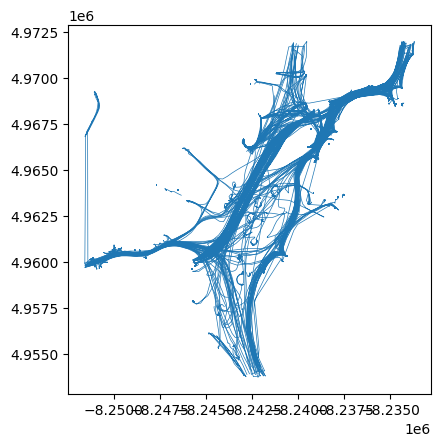

In [8]:
#convert to gdf
gdf1 = ds.to_gdf(tracks=track_ids, 
                ncores=4)

gdf1.plot(linewidth=0.5)

In [9]:
gdf1.head(5)

,MMSI,Agent ID,npoints,ntracks,Xmin,Xmax,Ymin,Ymax,Start Time,End Time,...,Effective Distance,Min Temporal Resolution,Mean Temporal Resolution,Max Temporal Resolution,Min Spatial Resolution,Mean Spatial Resolution,Max Spatial Resolution,Sinuosity,Track ID,geometry
Vessel_309987000_T0,309987000,Vessel_309987000,1418,1,-8.247311e+06,-8.243539e+06,4.956603e+06,4.961179e+06,2021-01-01 00:21:00,2021-01-01 23:58:00,...,5587.631585,60,60.000000,60,0.000000,5.754494,207.977597,1.459316,Vessel_309987000_T0,"LINESTRING (-8243929.973 4956721.168, -8243933..."
Vessel_338093826_T0,338093826,Vessel_338093826,109,1,-8.242976e+06,-8.242203e+06,4.954224e+06,4.966228e+06,2021-01-01 22:11:00,2021-01-01 23:59:00,...,11784.353750,60,60.000000,60,5.390432,115.218409,289.560230,1.055942,Vessel_338093826_T0,"LINESTRING (-8242203.212 4954223.653, -8242287..."
Vessel_338295000_T0,338295000,Vessel_338295000,141,1,-8.251321e+06,-8.233892e+06,4.958094e+06,4.971791e+06,2021-01-01 10:58:00,2021-01-01 13:16:00,...,21098.826329,16,59.128571,60,44.004310,208.937855,278.949127,1.386395,Vessel_338295000_T0,"LINESTRING (-8233892.267 4971791.313, -8233910..."
Vessel_338357486_T0,338357486,Vessel_338357486,435,1,-8.242775e+06,-8.233872e+06,4.966154e+06,4.971980e+06,2021-01-01 00:18:00,2021-01-01 07:28:00,...,4.671273,3,59.437788,60,0.000000,78.056780,390.232308,7252.121429,Vessel_338357486_T0,"LINESTRING (-8242338.888 4969905.441, -8242338..."
Vessel_338362545_T0,338362545,Vessel_338362545,276,1,-8.242847e+06,-8.241264e+06,4.953908e+06,4.969757e+06,2021-01-01 17:17:00,2021-01-01 21:52:00,...,1280.190554,60,60.000000,60,1.837197,118.164466,757.168391,25.383118,Vessel_338362545_T0,"LINESTRING (-8242383.416 4969667.718, -8242371..."


___
## Now, do it with the track segments. Be careful, this can take a long time and result in a huge GeoDataFrame if your data has many points. Be selective of tracks you are converting to segments.

In [10]:
#convert to gdf, segment return mode
gdf2 = ds.to_gdf(tracks=track_ids, 
                ncores=4,
                segments=True)

Converting track segments to GeoDataFrame: 100%|██████████| 100/100 [01:24<00:00,  1.18it/s]


<Axes: >

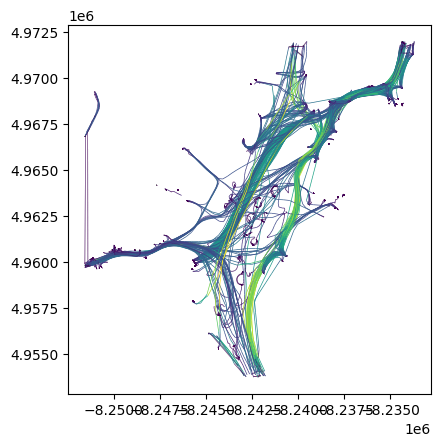

In [11]:
#plot the segments
gdf2.plot(linewidth=0.5, column='Speed', vmin=0, vmax=20)

In [12]:
gdf2.head(5)

,MMSI,Agent ID,npoints,ntracks,Xmin,Xmax,Ymin,Ymax,Start Time,End Time,...,Polygon,Which Polygon?,Segment ID,geometry,Acceleration,Characteristic,Turning Rate,Radius of Curvature,Distance Travelled,Raster
Vessel_309987000_T0_S0,309987000,Vessel_309987000,2,1,-8.243934e+06,-8.243930e+06,4.956721e+06,4.956722e+06,2021-01-01 00:21:00,2021-01-01 00:22:00,...,0,0,Vessel_309987000_T0_S0,"LINESTRING (-8243929.973 4956721.168, -8243933...",NaN,NaN,NaN,NaN,NaN,NaN
Vessel_309987000_T0_S1,309987000,Vessel_309987000,2,1,-8.243937e+06,-8.243934e+06,4.956722e+06,4.956722e+06,2021-01-01 00:22:00,2021-01-01 00:23:00,...,0,0,Vessel_309987000_T0_S1,"LINESTRING (-8243933.705 4956721.659, -8243937...",NaN,NaN,NaN,NaN,NaN,NaN
Vessel_309987000_T0_S2,309987000,Vessel_309987000,2,1,-8.243941e+06,-8.243937e+06,4.956721e+06,4.956722e+06,2021-01-01 00:23:00,2021-01-01 00:24:00,...,0,0,Vessel_309987000_T0_S2,"LINESTRING (-8243937.436 4956722.151, -8243940...",NaN,NaN,NaN,NaN,NaN,NaN
Vessel_309987000_T0_S3,309987000,Vessel_309987000,2,1,-8.243944e+06,-8.243941e+06,4.956720e+06,4.956721e+06,2021-01-01 00:24:00,2021-01-01 00:25:00,...,0,0,Vessel_309987000_T0_S3,"LINESTRING (-8243940.757 4956721.178, -8243944...",NaN,NaN,NaN,NaN,NaN,NaN
Vessel_309987000_T0_S4,309987000,Vessel_309987000,2,1,-8.243947e+06,-8.243944e+06,4.956719e+06,4.956720e+06,2021-01-01 00:25:00,2021-01-01 00:26:00,...,0,0,Vessel_309987000_T0_S4,"LINESTRING (-8243944.078 4956720.206, -8243947...",NaN,NaN,NaN,NaN,NaN,NaN


___
## Rasterizing Track Counts

This method uses the GDAL rasterize function to burn track counts into background rasters. A track is counted in a given pixel if any part of that track touches the pixel. The same track crossing over the same pixel can result in multiple counts.

In [13]:
#save the gdf to use it for rasterizing
gdf_file = 'files/gdf.gpkg'
gdf2[['Speed','geometry']].to_file(gdf_file)

In [14]:
#define blank raster output file
blank_file = 'files/blank.tif'

#get bounds of dataset
x0, y0, x1, y1 = ds.agents.total_bounds

#create blank zero raster
tio.create_blank_raster(blank_file,
                        ds.meta['CRS'],
                        grid={'x0': x0,
                              'y0': y0,
                              'nx': int((x1-x0)/100),
                              'ny': int((y1-y0)/100),
                              'dx': 100,
                              'dy': 100})

Raster created and saved to files/blank.tif!


In [15]:
#define output file
count_file = 'files/track_counts.tif'

#rasterize the track counts
tio.rasterize(gdf_file, blank_file, count_file)

Track Counts written to c:\code\trackio\notebooks\files\track_counts.tif


<Axes: >

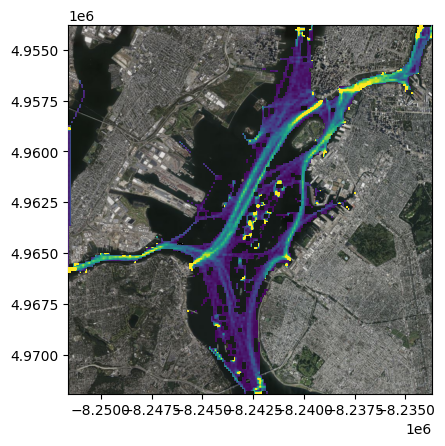

In [16]:
#plot the track counts
bm = rio.open('files/basemap.tif', 'r')
count = rio.open(count_file, 'r')

fig,ax=plt.subplots()
show(bm, ax=ax, zorder=0, origin='lower')
show(count, ax=ax, zorder=10, vmin=0, vmax=50, origin='lower')

___
## Rasterizing Track Attributes

This can be used to rasterize dynamic attributes (i.e. Speed, Duration, etc.) along tracks into a background raster. This can be useful for making spatial maps of average values, like mean speed or the average dimension of vessels passing over a given area. Or, it can be used to approximate the amount of time spent in each pixel.

In [17]:
#define output file
speed_file = 'files/track_speeds.tif'

#rasterize the track counts
tio.rasterize(gdf_file, blank_file, speed_file, attribute='Speed')

Track Speed written to c:\code\trackio\notebooks\files\track_speeds.tif


In [18]:
#make a mean speed raster
count = rio.open(count_file, 'r')
speed = rio.open(speed_file, 'r')
with rio.open('files/mean_speed.tif', 'w', **count.profile) as f:
    f.write(speed.read(1)/count.read(1), 1)

<Axes: >

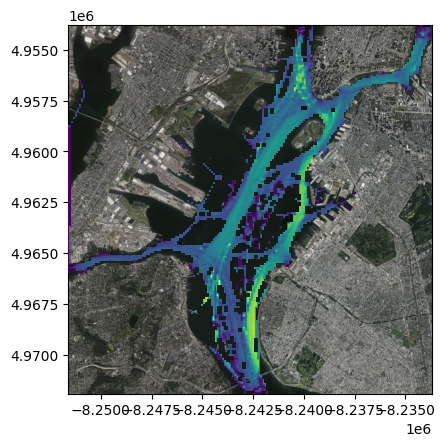

In [19]:
#plot the track counts
bm = rio.open('files/basemap.tif', 'r')
mean_speed = rio.open('files/mean_speed.tif', 'r')

fig,ax=plt.subplots()
show(bm, ax=ax, zorder=0, origin='lower')
show(mean_speed, ax=ax, zorder=10, vmin=0, vmax=20, origin='lower')

___
## Converting to Dask Bag

This method is used to convert the `Dataset` to a dask bag. Each element in the bag is a `trackio.Agent` object from the `Datset`.

This allows you to do whatever operations you want on the data, while leveraging Dask's parallel optimization capabilities. It's great for extending custom functionality.

In [20]:
#convert to dask bag
bag = ds.to_dask_bag()

In [21]:
#calculate max speed at each track
def grab_max_track_speed(agent):
    for tid in agent.tracks.keys():
        track = agent.tracks[tid]
        track_id = agent.agent_meta['Tracks'][tid]['Track ID']
        max_speed = track['Speed'].max()
    return track_id, max_speed

results = bag.map(grab_max_track_speed).compute()

pd.DataFrame(results)

,0,1
0,Vessel_248290000_T0,8.652334
1,Vessel_309987000_T0,3.445083
2,Vessel_338073000_T0,6.781710
3,Vessel_338093826_T0,4.826004
4,Vessel_338295000_T0,4.647799
...,...,...
158,Vessel_566855000_T0,4.574004
159,Vessel_636013689_T0,6.625373
160,Vessel_636015050_T0,0.100807
161,Vessel_636015514_T0,0.093611
